# Plotting Pandapower Networks

This tutorial shows you how to plot pandapower networks. 

We use matplotlib collections to plot the stations or lines in the network. There are different types of elements in matplotlib, like lines, circles, rectangles etc. These elements are bundled into collections, where one objects holds many elements of the same type (see matplotlib documentation: http://matplotlib.org/api/collections_api.html).

The plotting module provides several functions that create collections from pandapower networks. In this interactive tutorial, we show you how to use these functions to plot networks.

In [1]:
import matplotlib.pyplot as plt
import os
import pandapower as pp
import pandapower.plotting as plot
import pandapower.networks as nw
try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]
%matplotlib inline

## Simple Plotting

First, we plot only the lines and buses of an example network. This is done by creating a line collection for all lines and a bus collection for all buses. We then plot both collections with the draw_collections function:

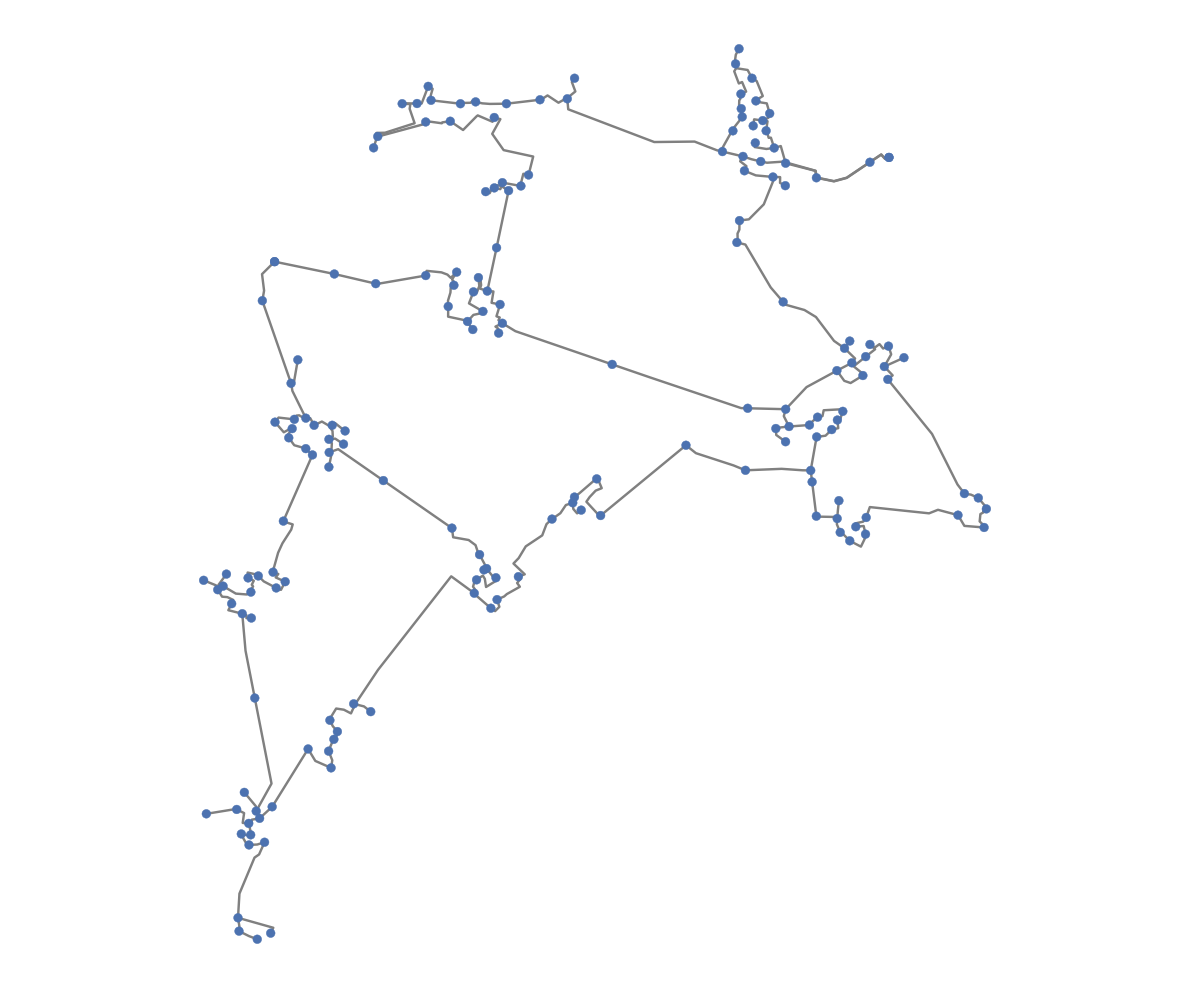

In [2]:
net = nw.mv_oberrhein()
lc = plot.create_line_collection(net, net.line.index, color="grey", zorder=1) #create lines
bc = plot.create_bus_collection(net, net.bus.index, size=80, color=colors[0], zorder=2) #create buses
plot.draw_collections([lc, bc], figsize=(12,10)) #plot lines and buses

## Highlighting

Specific lines or buses can be highlighted by creating extra line collections in different colors.

In this example, we plot lines that are longer than 2 km green and buses with a voltage below 0.97 pu red.

First, we create a line collection for all lines in grey and a line collection for only the long lines in green:

In [3]:
net = nw.mv_oberrhein()
long_lines = net.line[net.line.length_km > 2.].index
lc = plot.create_line_collection(net, net.line.index, color="grey", zorder=1)
lcl = plot.create_line_collection(net, long_lines, color="g", zorder=2)

Notice that the zorder is higher for the long line collection. This ensures that the red line collection is plotted over the grey line collection.

We then conduct a loadflow and create bus collections in the same way:

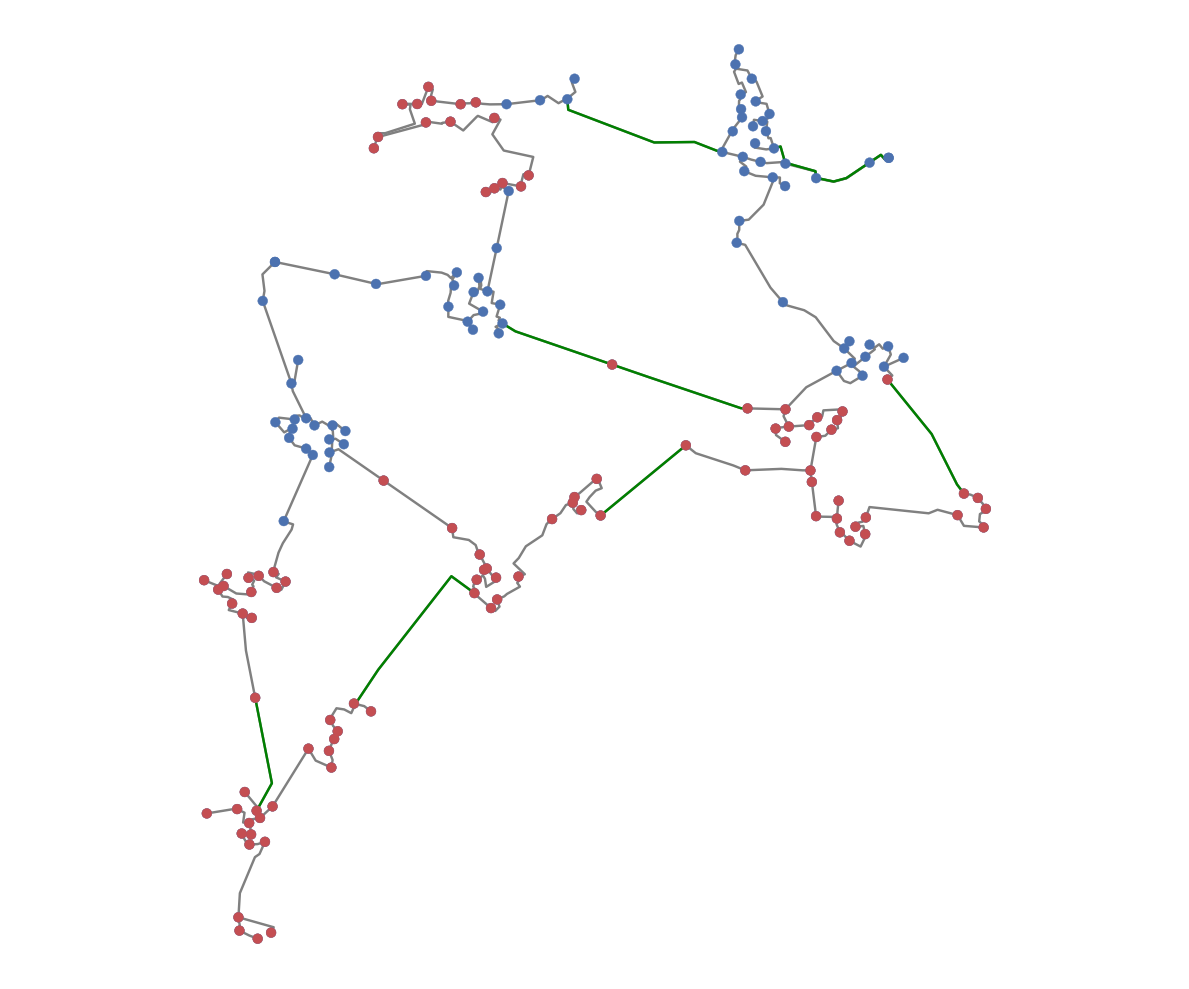

In [4]:
pp.runpp(net)
high_voltage_buses = net.res_bus[net.res_bus.vm_pu < 0.97].index
bc = plot.create_bus_collection(net, net.bus.index, size=90, color=colors[0], zorder=10)
bch = plot.create_bus_collection(net, high_voltage_buses, size=90, color=colors[2], zorder=11)
plot.draw_collections([lc, lcl, bc, bch], figsize=(12,10))

Another way to highlight something is to use a different shape using the patch_type argument of the create_bus collection. You can for example mark the slack bus with a rectangle shape like this:

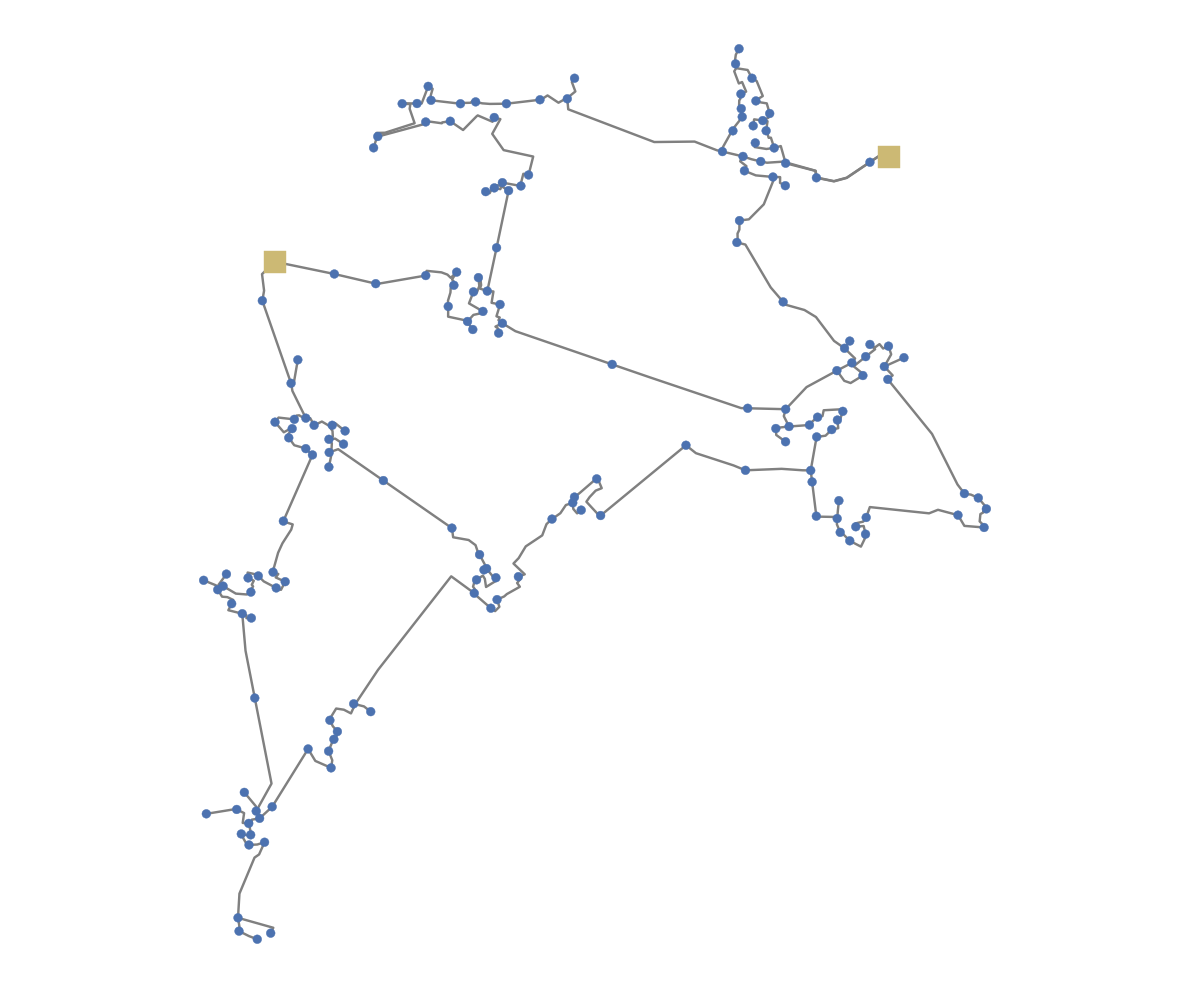

In [5]:
net = nw.mv_oberrhein()
lc = plot.create_line_collection(net, net.line.index, color="grey", zorder=1) #create lines
bc = plot.create_bus_collection(net, net.bus.index, size=80, color=colors[0], zorder=2) #create buses
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=200, color=colors[4], zorder=11)
plot.draw_collections([lc, bc, sc], figsize=(12, 10)) #plot lines and buses

## Highlighting with the Topology Package

Combining the [topology package](topology.ipynb) with the plotting package allows highlighting of structural features of the network. For example, we can highlight all buses closer than 5 km to a transformer station:

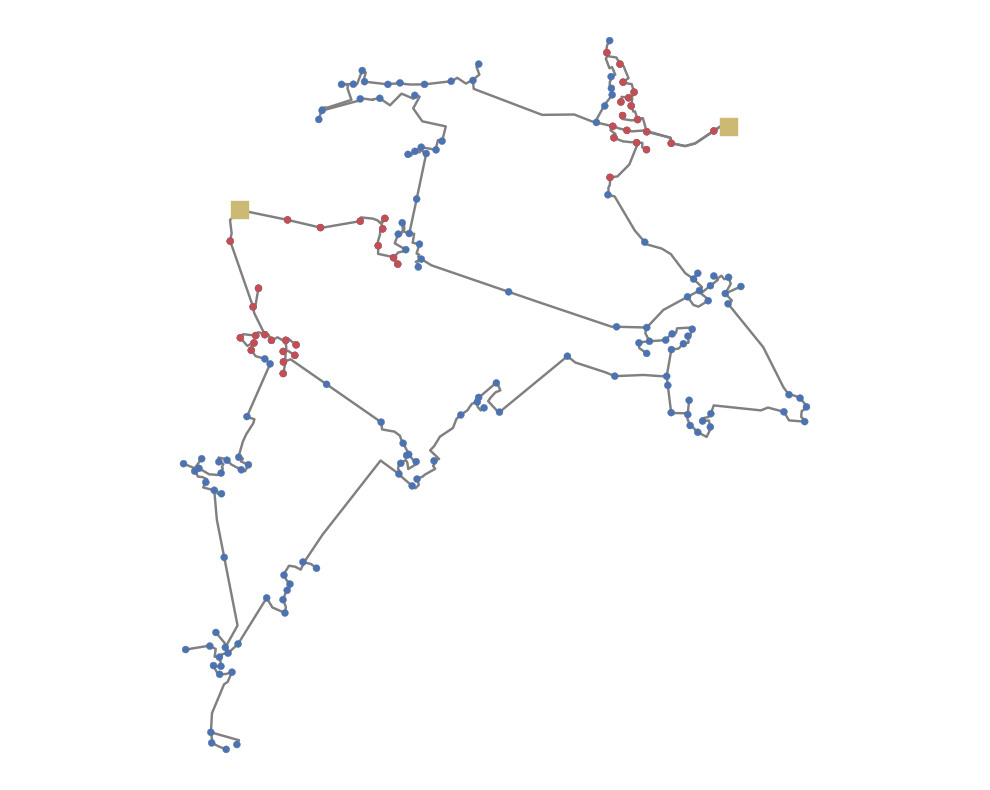

In [6]:
net = nw.mv_oberrhein()
close_buses = set()
for slack in net.ext_grid.bus:
    d = pp.topology.calc_distance_to_bus(net, slack)
    close_buses |= set(d[d < 5].index)

bc = plot.create_bus_collection(net, net.bus.index, size=80, color=colors[0], zorder=1)
bch = plot.create_bus_collection(net, close_buses, size=80, color=colors[2], zorder=2)
lc = plot.create_line_collection(net, net.line.index, zorder=1, color="grey")
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=200, color=colors[4], zorder=11)
plot.draw_collections([lc, bc, bch, sc])

Or to highlight the radiality of the network, plot the seperate feeders in different colors:

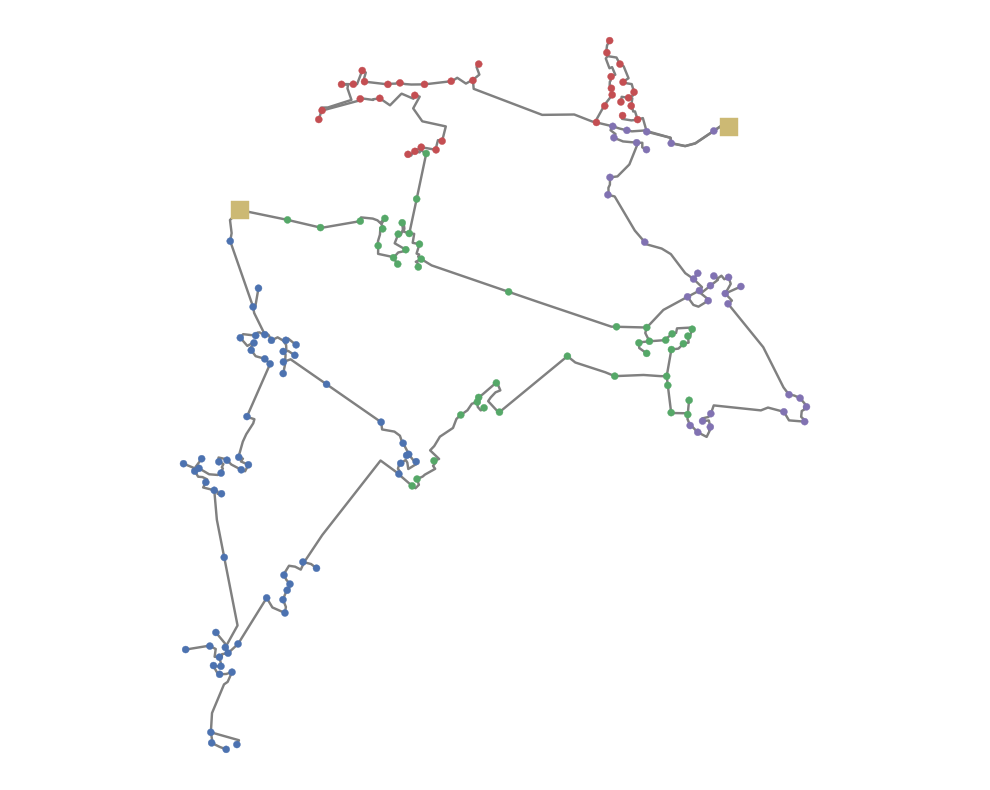

In [7]:
net = nw.mv_oberrhein()
mg = pp.topology.create_nxgraph(net, nogobuses=set(net.trafo.lv_bus.values) | set(net.trafo.hv_bus.values))
collections = []
for color, area in zip(colors, pp.topology.connected_components(mg)):
    collections.append(plot.create_bus_collection(net, area, size=80, color=color, zorder=2))
collections.append(plot.create_line_collection(net, net.line.index, zorder=1, color="grey"))
collections.append(plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=200,
                                              color=colors[4], zorder=11))
plot.draw_collections(collections)

## Direct Line Connections

Line collections are plotted with the geographical coordinates of the lines that are stored in net.line_geodata by default. You can also plot lines as direct connections between the buses, by calling the create_line_collection function with use_line_geodata=False:

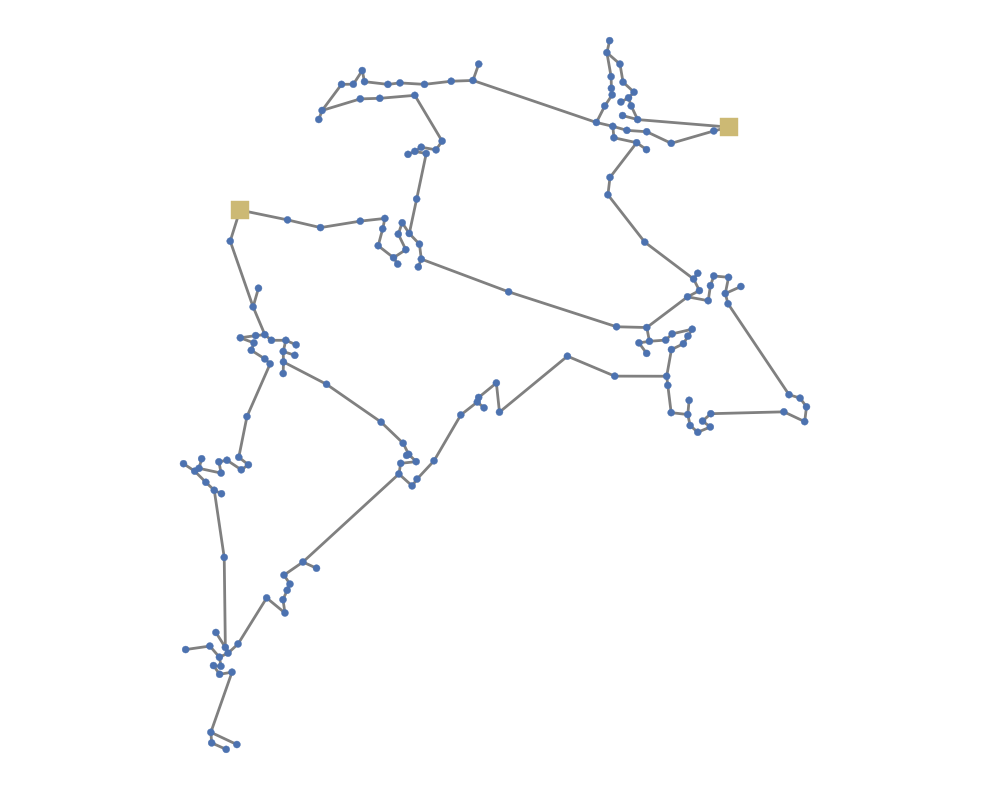

In [8]:
net = nw.mv_oberrhein()
bc = plot.create_bus_collection(net, net.bus.index, size=80, color=colors[0], zorder=10)
lcd = plot.create_line_collection(net, net.line.index, use_line_geodata=False, color="grey", linewidths=2.)
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=200,
                                              color=colors[4], zorder=11)
plot.draw_collections([lcd, bc, sc])

As a comparison, here are the lines with direct connections (solid) and the line trails from line_geodata (dashed):

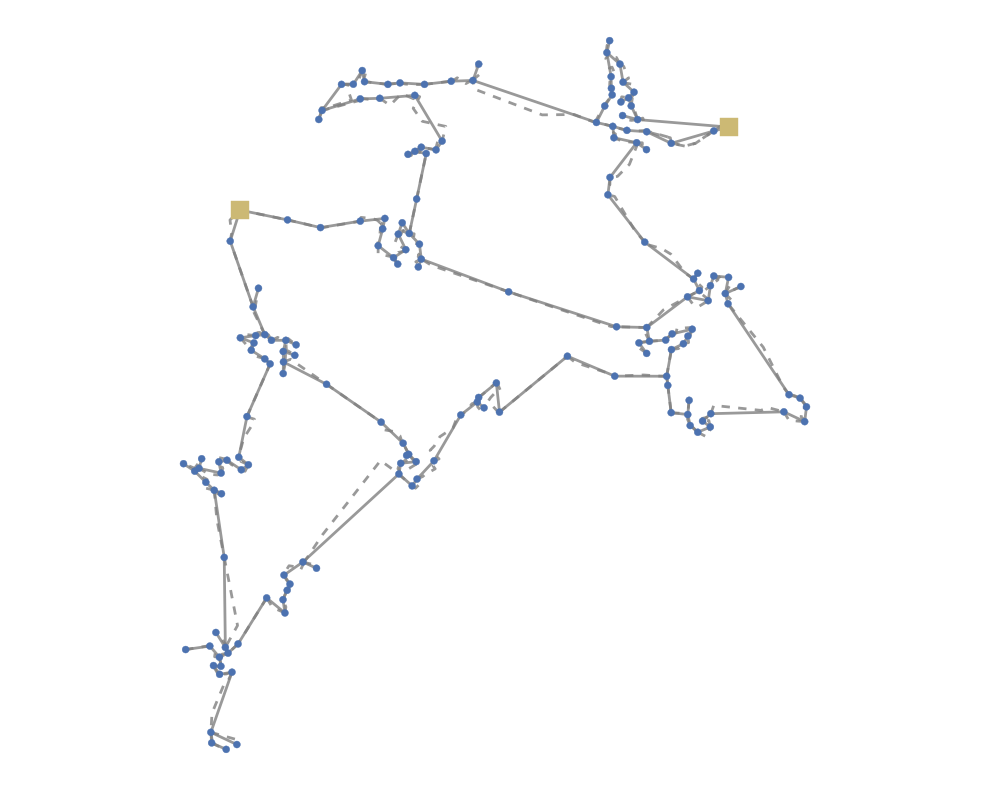

In [9]:
net = nw.mv_oberrhein()
bc = plot.create_bus_collection(net, net.bus.index, size=80, color=colors[0], zorder=10)
lcd = plot.create_line_collection(net, lines=net.line.index, color="grey",alpha=0.8, linewidths=2., use_line_geodata=False)
lc = plot.create_line_collection(net, lines=net.line.index, color="grey",alpha=0.8, linestyles="dashed", linewidths=2.)
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=200,
                                              color=colors[4], zorder=11)
plot.draw_collections([lc, lcd, bc, sc])

## Generic Coordinates

If you do not have geographic coordinates, you can create generic coordinates for plotting with the create_generic_coordinates function.

<div class="alert alert-warning">
You need to install the python-igraph package for this functionality: http://igraph.org/python/
<div/>

We delete the geocoordinates from the network and create generic ones:

In [10]:
net = nw.mv_oberrhein()
del net.bus_geodata #delete the geocoordinates
del net.line_geodata
plot.create_generic_coordinates(net, respect_switches=False) #create artificial coordinates with the igraph package

ValueError: not enough values to unpack (expected 3, got 2)

As you can see the table bus_geodata has been created and we can now plot as before. Since the function only creates bus geodata, we can only use the direct line plotting. Furthermore it creates a distance between high- and low voltage bus of a transformer, which is why we also need a transformer collection:

In [11]:
bc = plot.create_bus_collection(net, net.bus.index, size=.2, color=colors[0], zorder=10)
tc = plot.create_trafo_collection(net, net.trafo.index, color="g")
lcd = plot.create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_line_geodata=False)
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=.5, color="y", zorder=11)
plot.draw_collections([lcd, bc, tc, sc], figsize=(12,10))

KeyError: 'None of [[0, 1, 2, 3, 4, 5, 6, 7, 8, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 64, 65, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 94, 95, 98, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 116, 117, 118, 119, 120, 126, 129, 131, 132, 133, 134, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 153, 155, 157, 159, 161, 162, 167, 168, 169, 170, 171, 172, 173, 174, 176, 178, 181, 184, 186, 188, 189, 190, 192, 194, 195, 196, 197, 198, 199, 200, 201, 205, 207, 210, 213, 215, 216, 219, 221, 223, 224, 227, 229, 231, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 253, 269, 271, 273, 275, 281, 285, 286, 287, 288, 289, 290, 298, 301, 303, 304, 305, 312, 313, 314, 315, 316, 317, 318, 319]] are in the [index]'

The create_generic_coordinates function treats transformers as edges, which means the HV and LV side of the transformer are shown by seperate buses with a connection (green line).

If you do not want to plot the transformers you can use the fuse_geodata function. It fuses the geocoordinates of all buses that are geographically in one place (HV/LV bus of a transformer or buses and buses that are connected by a bu-bus switch):

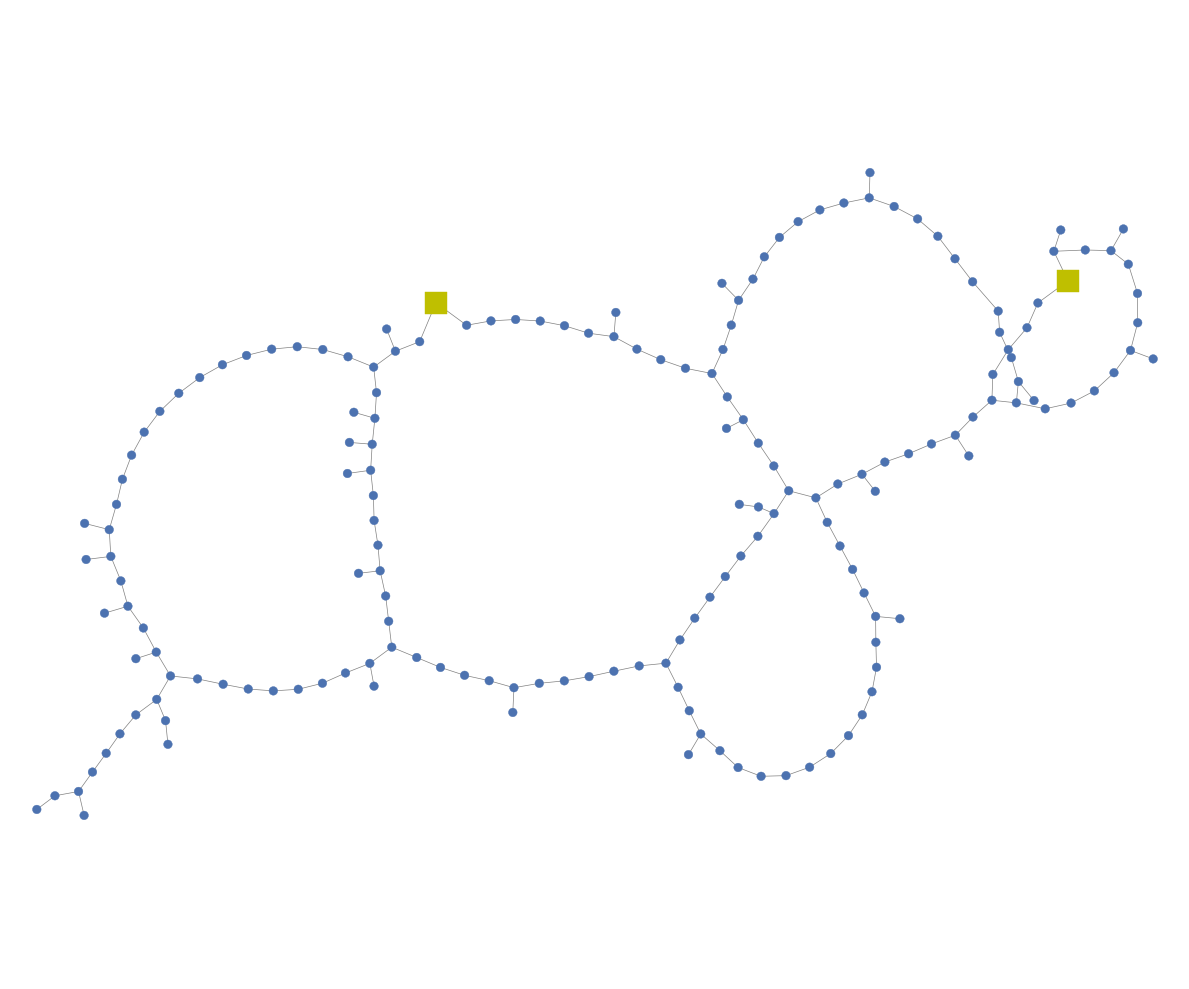

In [8]:
plot.fuse_geodata(net)
bc = plot.create_bus_collection(net, net.bus.index, size=.2, color=colors[0], zorder=10)
tc = plot.create_trafo_collection(net, net.trafo.index, color="g")
lcd = plot.create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_line_geodata=False)
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=.5, color="y", zorder=11)
plot.draw_collections([lcd, bc, tc, sc], figsize=(12,10))

## Plot Structural Plans

To plot a structural plan of the network instead of a geographical one, call the generic coordinates function with respect_switches=True.

In [9]:
net = nw.mv_oberrhein()
del net.bus_geodata #delete the geocoordinates
del net.line_geodata
plot.create_generic_coordinates(net, respect_switches=True) #create artificial coordinates with the igraph package

This pandapower network includes the following parameter tables:
   - load (147 elements)
   - switch (318 elements)
   - sgen (153 elements)
   - trafo (2 elements)
   - line (181 elements)
   - bus (179 elements)
   - bus_geodata (179 elements)
   - ext_grid (2 elements)
 and the following results tables:
   - res_trafo (2 elements)
   - res_bus (179 elements)
   - res_sgen (153 elements)
   - res_ext_grid (2 elements)
   - res_load (147 elements)
   - res_line (181 elements)

In that way, the algorithm seperates buses which are seperated by an open switch:

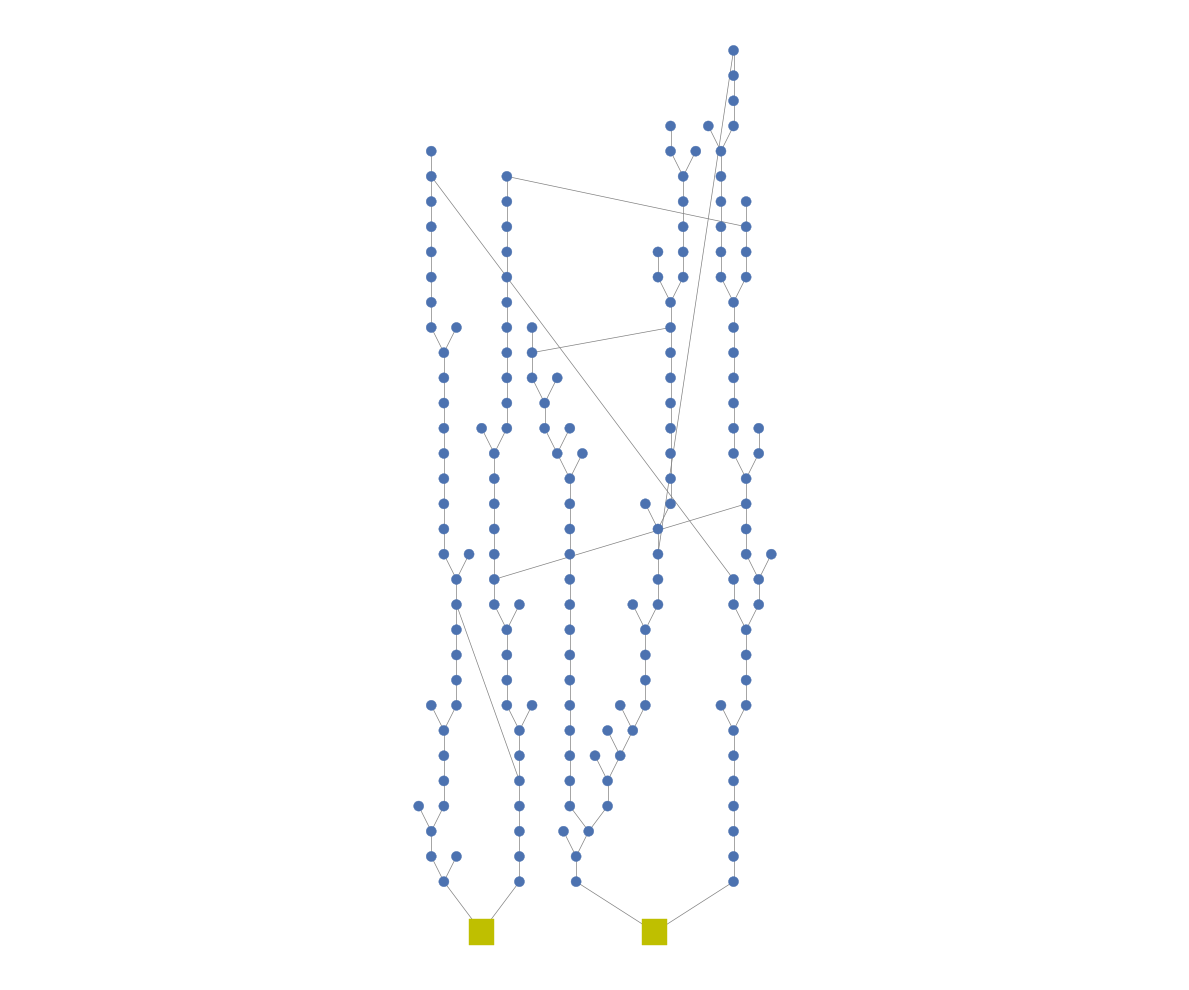

In [10]:
plot.fuse_geodata(net)
bc = plot.create_bus_collection(net, net.bus.index, size=.2, color=colors[0], zorder=10)
tc = plot.create_trafo_collection(net, net.trafo.index, color="g")
lcd = plot.create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_line_geodata=False)
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=.5, color="y", zorder=11)
plot.draw_collections([lcd, bc, tc, sc], figsize=(12,10))

For a clearer arrangement, it might be useful to only plot the lines without an open switch:

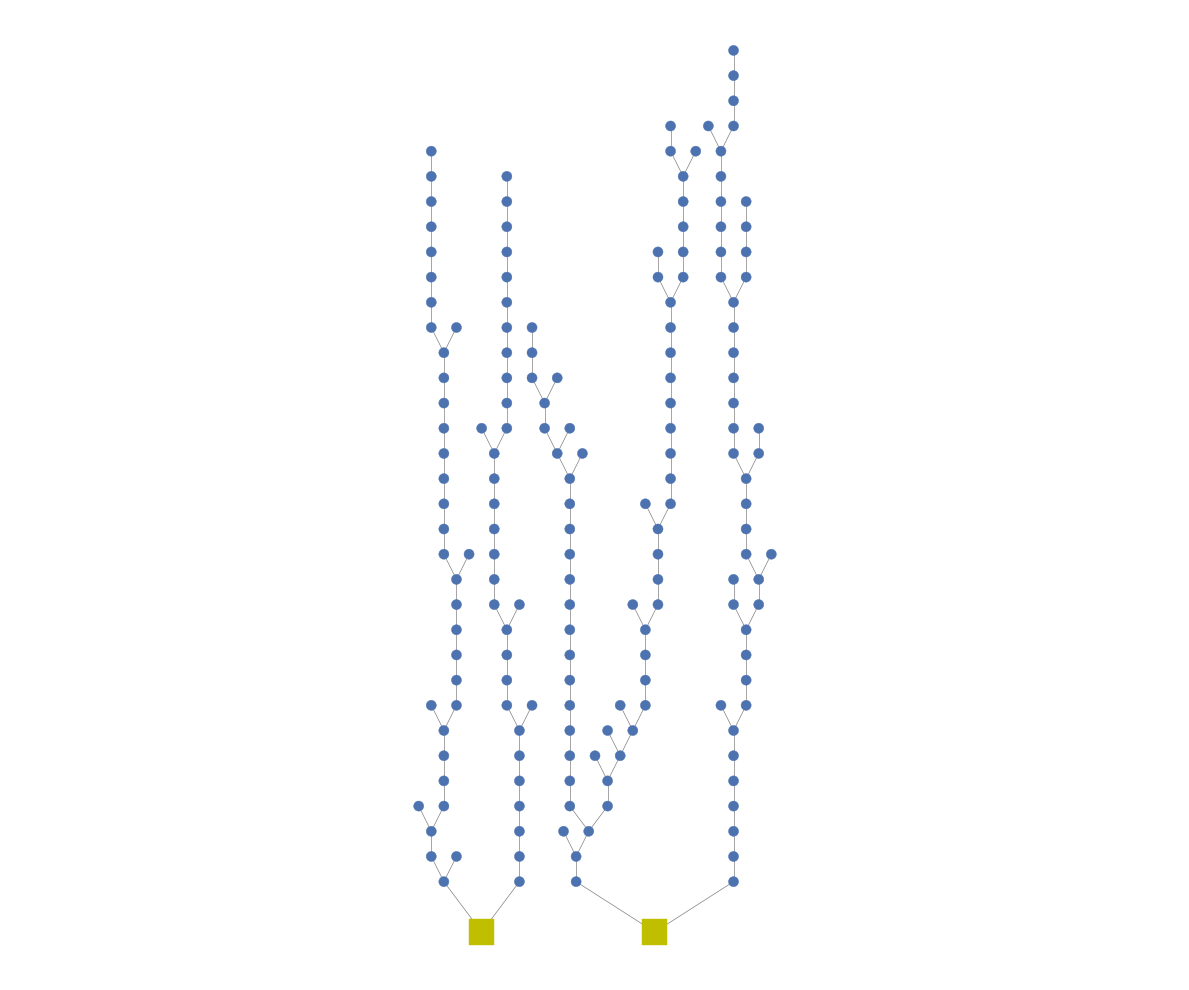

In [11]:
closed_lines = set(net.line.index) - set(net.switch[(net.switch.et=="l") & (net.switch.closed==False)].element.values)
lcd = plot.create_line_collection(net, closed_lines, color="grey", linewidths=0.5, use_line_geodata=False)
plot.draw_collections([lcd, bc, tc, sc], figsize=(12,10))

## Plot line loadings and bus voltages

You can use colormaps to colour your network plots in order to get a quick and simple overview of line loadings and bus voltages. The plotting module provides functions to easily modify your bus and line collections. It also provides colourbars to match the colourcodes to the according numerical values.

In the following example you can see a network plot with colourbars. Most buses' voltages are between 0.96 and 1.04 p.u. There are no lines with loadings more than 80%.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import os
import pandapower as pp
import pandapower.plotting as plot
import pandapower.networks as nw

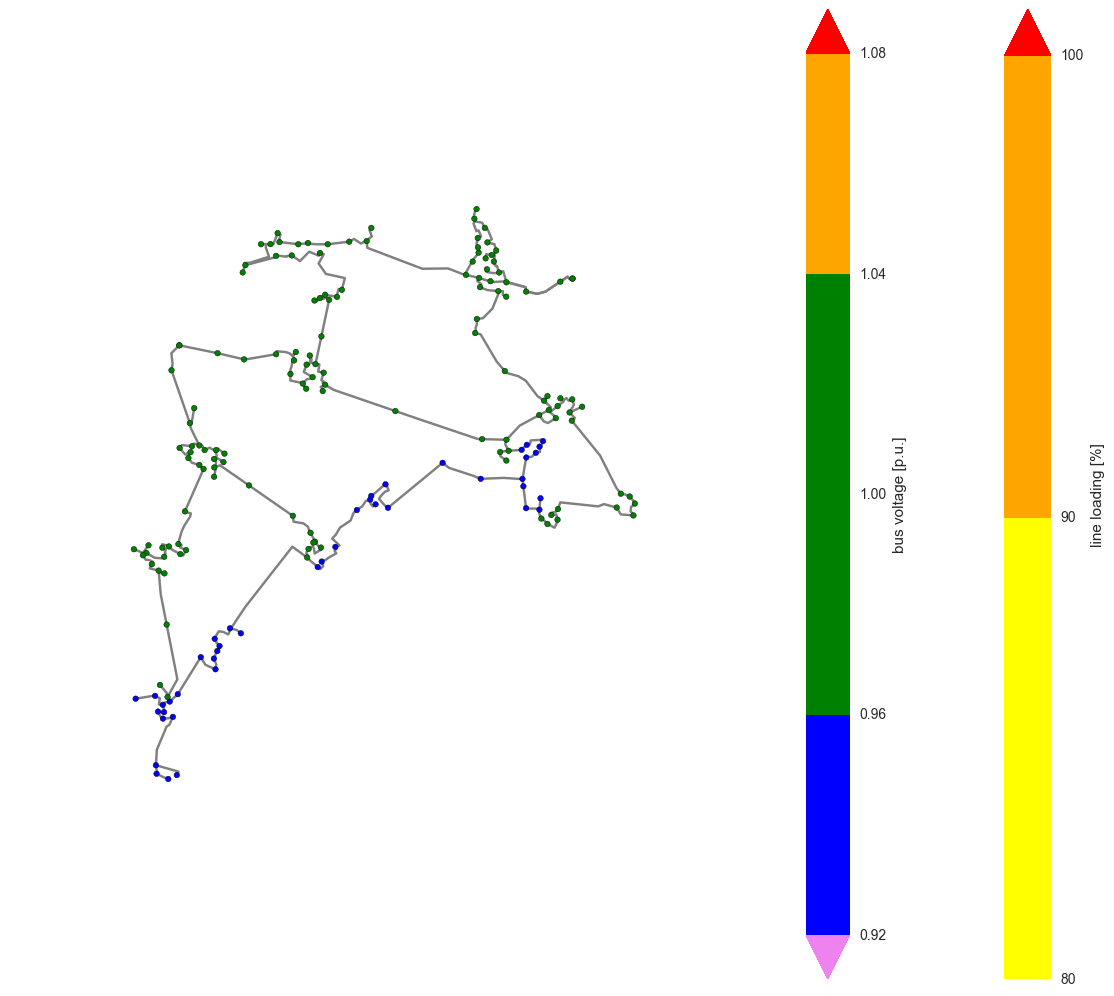

In [14]:
net = nw.mv_oberrhein()
lc = plot.create_line_collection(net, net.line.index, color="grey", zorder=1) # creates a line collection
bc = plot.create_bus_collection(net, net.bus.index, size=80, zorder=2) # creates a bus collection
plot.colour_line_loadings(net, lc) # colours lines
plot.colour_bus_voltages(net, bc) # colours buses

plot.draw_collections([lc, bc], figsize=(12,10)) # plots lines and buses
plot.add_line_loadings_colourbar(lc) # adds line loading colourbar
plot.add_bus_voltages_colourbar(bc) # adds bus voltages colourbar

If you increase the load by a factor of two, you can see a rise in line loadings and a voltage drop at a big number of buses.

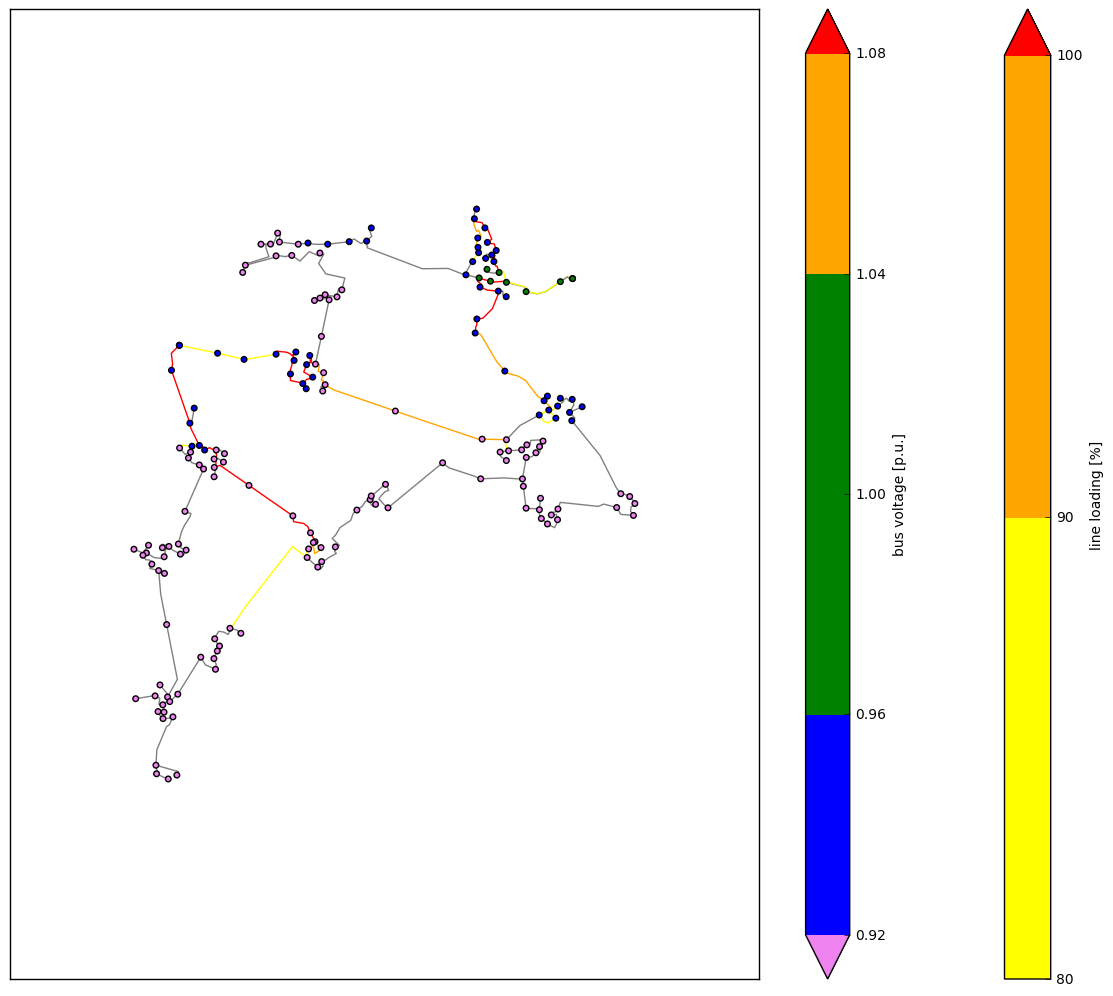

In [28]:
net.load.p_kw *= 2
lc = plot.create_line_collection(net, net.line.index, color="grey", zorder=1) # creates a line collection
bc = plot.create_bus_collection(net, net.bus.index, size=80, zorder=2) # creates a bus collection
plot.colour_line_loadings(net, lc) # colours lines
plot.colour_bus_voltages(net, bc) # colours buses

plot.draw_collections([lc, bc], figsize=(12,10)) # plots lines and buses
plot.add_line_loadings_colourbar(lc) # adds line loading colourbar
plot.add_bus_voltages_colourbar(bc) # adds bus voltages colourbar

It is also possible to adjust the colourbars' segments (Note: segments do not need to be symmetric!). Let's say, you temporarily tolerate a maximum line loading of 120%, but the voltage may not drop below 0.94 p.u.
To adjust the colourmaps and colourbars accordingly you need the overwrite the default loading and voltage thresholds.

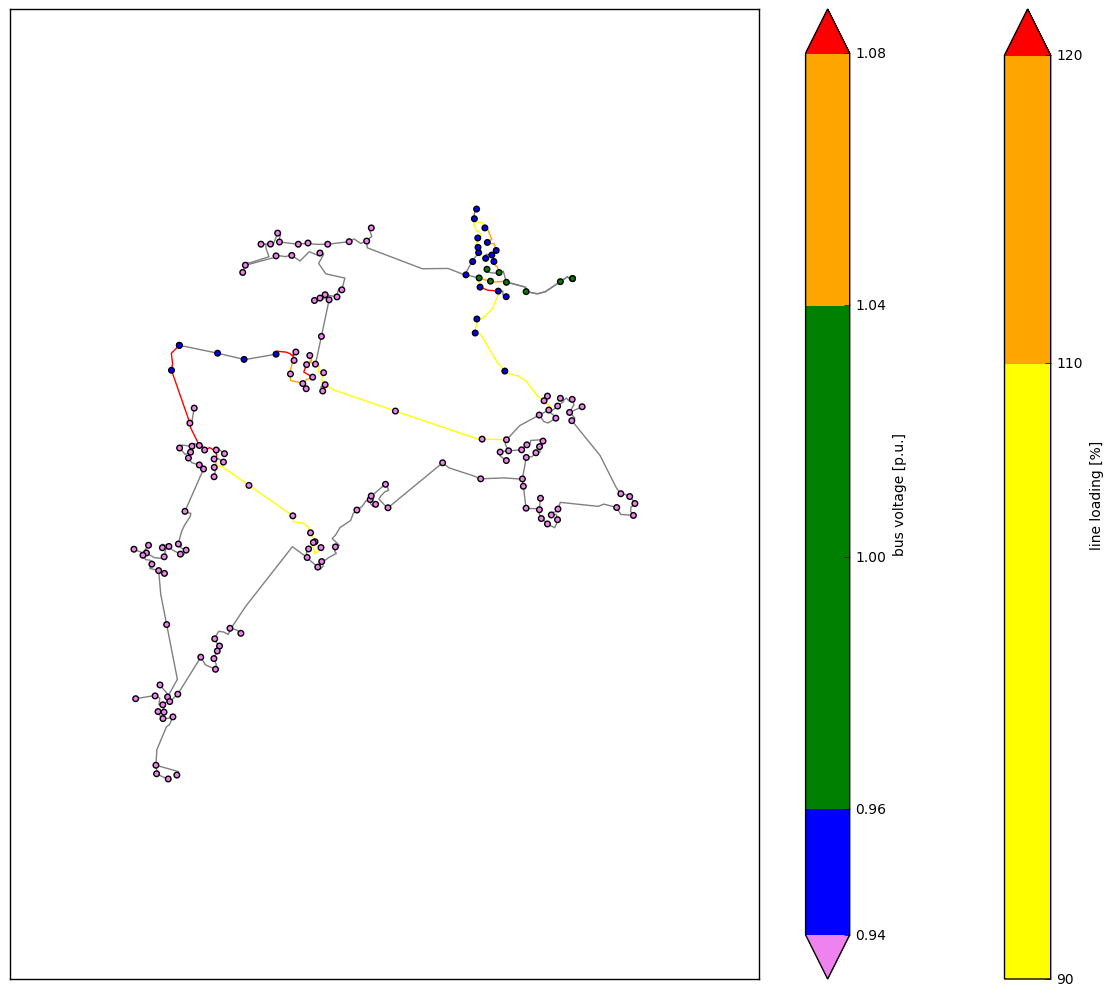

In [31]:
net = nw.mv_oberrhein()
net.load.p_kw *= 2
lc = plot.create_line_collection(net, net.line.index, color="grey", zorder=1) # creates a line collection
bc = plot.create_bus_collection(net, net.bus.index, size=80, zorder=2) # creates a bus collection
loading_ticks_percent = [90, 110, 120]
voltage_ticks_pu=[0.94, 0.96, 1, 1.04, 1.08]
plot.colour_line_loadings(net, lc, loading_ticks_percent=loading_ticks_percent) # colours lines
plot.colour_bus_voltages(net, bc, voltage_ticks_pu=voltage_ticks_pu) # colours buses

plot.draw_collections([lc, bc], figsize=(12,10)) # plots lines and buses
plot.add_line_loadings_colourbar(lc, loading_ticks_percent=loading_ticks_percent) # adds line loading colourbar
plot.add_bus_voltages_colourbar(bc, voltage_ticks_pu=voltage_ticks_pu) # adds bus voltages colourbar